NAME : KISHORE RAJ ETHIRAJ
MAIL ID : kethiraj@uncc.edu

In [1]:
%matplotlib inline

# Importing all required package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
data = pd.read_csv("/Users/kishoreraj/Downloads/loan_timing.csv")

## We create columns "No_of_DaysElapsed" and "ChargedOff" to check the trend for "days from origination to chargeoff" 
#  and the trend at which the loans  have been charged off :

data["No_of_DaysElapsed"] = np.where(data["days from origination to chargeoff"].isnull(), 
                             data["days since origination"].astype(int, errors="ignore"), 
                             data["days from origination to chargeoff"].astype(int, errors="ignore"))


data["ChargedOff"] = np.where(data["days from origination to chargeoff"].isnull(), 0, 1)

data

,days since origination,days from origination to chargeoff,No_of_DaysElapsed,ChargedOff
0,109,NaN,109.0,0
1,679,NaN,679.0,0
2,723,NaN,723.0,0
3,509,NaN,509.0,0
4,254,NaN,254.0,0
5,158,NaN,158.0,0
6,302,NaN,302.0,0
7,143,NaN,143.0,0
8,354,NaN,354.0,0
9,438,NaN,438.0,0


In [3]:
## Checking for number of null values in each column
data.isnull().sum()

days since origination                    0
days from origination to chargeoff    46695
No_of_DaysElapsed                         0
ChargedOff                                0
dtype: int64

In [4]:
# Statistics about the Dataframe we created above
data.describe()

,days since origination,days from origination to chargeoff,No_of_DaysElapsed,ChargedOff
count,50000.000000,3305.000000,50000.000000,50000.000000
mean,365.844760,214.852345,348.701960,0.066100
std,210.965114,165.233874,211.373155,0.248459
min,0.000000,0.000000,0.000000,0.000000
25%,183.000000,76.000000,163.000000,0.000000
50%,366.000000,180.000000,341.000000,0.000000
75%,549.000000,323.000000,530.000000,0.000000
max,730.000000,725.000000,730.000000,1.000000


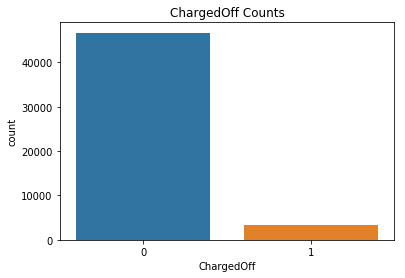

In [5]:
## Plotting ChargedOffCounts(0 for customers who have not chargedoff and 1 for customers who have chargedoff)
#  to see the distribution
graph = sb.countplot(x="ChargedOff",data=data)
graph.set_title("ChargedOff Counts")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a427128>,
      dtype=object)

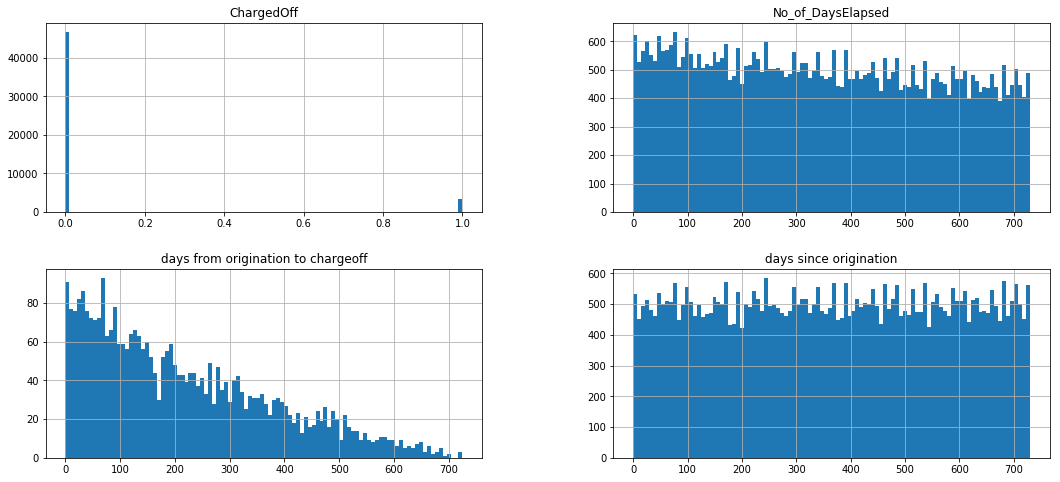

In [6]:
# Plotting Data Distribution of each column

data.hist(figsize=(18,8), bins=100)


[Text(0,0,'0'),
 Text(0,0,'100'),
 Text(0,0,'200'),
 Text(0,0,'300'),
 Text(0,0,'400'),
 Text(0,0,'500'),
 Text(0,0,'600'),
 Text(0,0,'700'),
 Text(0,0,'800')]

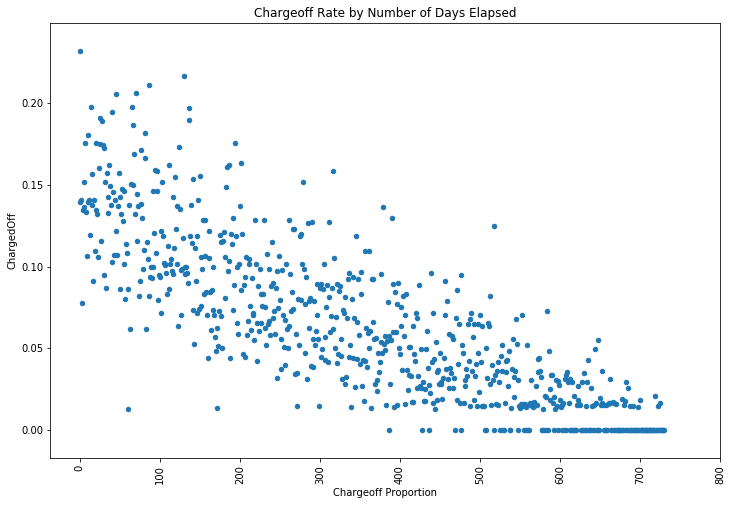

In [7]:
## Plotting Chargeoff Proportion vs ChargedOff to check for any trend.

plot = data.groupby("No_of_DaysElapsed")["ChargedOff"].mean()\
                                               .reset_index()\
                                               .plot.scatter(x="No_of_DaysElapsed",
                                                             y="ChargedOff",
                                                             xticks=[0,800],
                                                             figsize=(12,8),
                                                             title="Chargeoff Rate by Number of Days Elapsed")
plot.set_xlabel("Chargeoff Proportion")
plot.set_xticks([i*100 for i in range(9)])
plot.set_xticklabels([i*100 for i in range(9)], rotation=90)


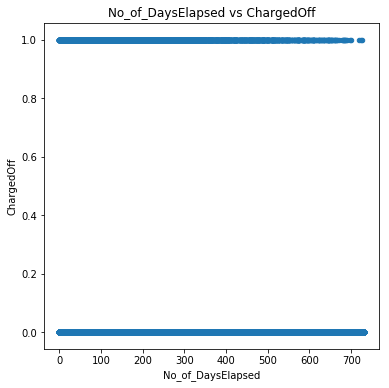

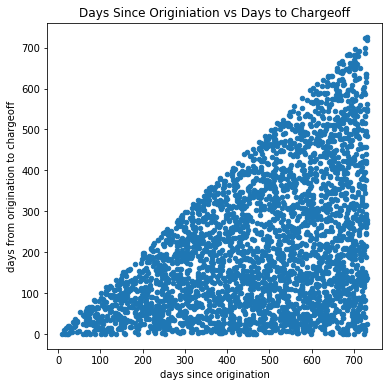

In [8]:
data.plot.scatter(x="No_of_DaysElapsed", y="ChargedOff", 
                 title="No_of_DaysElapsed vs ChargedOff",figsize=(6,6))


data.plot.scatter(x='days since origination', y="days from origination to chargeoff", 
                 title="Days Since Originiation vs Days to Chargeoff",figsize=(6,6))


In [ ]:
 """ From the above plots we can see that:

 1. The longer someone goes without defaulting on their loan,it is less likely they would default 
 
 2. We have a fairly uniform distribution of the column "days since origination", but the distribution
    of chargeoffs appears to be an exponential distribution, reduces to 0 as we reach the 3 year mark.



In [ ]:
""""
    We model the problem using logistic regression, where our dependent variable is IsDefault, and our predictor is
    "days since origination" for IsDefault=0, else days_from_orig_to_chargeoff

    Assumptions:

        1) I have assumed here that the sample is random and drawn from the same population and all the data
           was recorded on the same day
        
        2) Independent Observations(Assumed two loans are not related)
        
        3) The outcome is Binary (0 for loans that would not chargeoff and 1 for loans would chargeoff)
        
        4) Since only one predictor is used, there is no Multicollinearity in the data.
        
        
  

Text(0.5,1,'LogOdds of Chargeoff vs No_of_DaysElapsed')

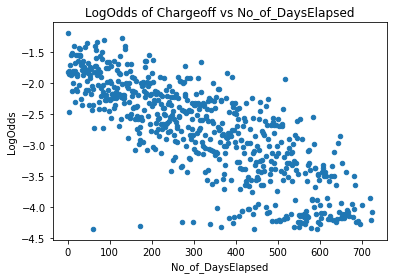

In [9]:
## To check for the Linearity of predictor variables and log odds:

#We will do a crude test below by plotting observed log odds alongside No_of_DaysElapsed
            

probability = data.groupby("No_of_DaysElapsed")["ChargedOff"].mean().reset_index()


probability = probability[probability["ChargedOff"]!=0]
probability["Odds"] = probability.ChargedOff/(1-probability.ChargedOff)
probability["LogOdds"] = np.log(probability["Odds"])
ax = probability.plot.scatter(x="No_of_DaysElapsed", y="LogOdds")

ax.set_title("LogOdds of Chargeoff vs No_of_DaysElapsed")

In [10]:
## We perform Logistic Regression on the entire dataset. 

## Logistic Regression was trained to predict whether each loan would be chargedoff or not after 3 years.

## Building a Logistic Regression Model from Scikit-Learn.


from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
X = np.reshape(data.No_of_DaysElapsed.values,(-1,1))
Y = np.reshape(data.ChargedOff.values,(-1,1)).ravel()
logreg.fit(X, Y)

X_not_yet_charged_off = np.reshape(data["No_of_DaysElapsed"][data.ChargedOff == 0].values,(-1,1))
logpred = logreg.predict_proba(X_not_yet_charged_off)
chargeoff_probs = logpred[:,1]
print("Intercept: ", logreg.intercept_)
print("Coefficient: ", logreg.coef_[0])
print ("Expectation future chargeoffs: ", sum(chargeoff_probs))
print("With each extra day elapsed since origination, our odds of a chargeoff change by a factor of",
      (np.exp(logreg.coef_)))

Intercept:  [-1.61603736]
Coefficient:  [-0.00365308]
Expectation future chargeoffs:  2997.7507665416315
With each extra day elapsed since origination, our odds of a chargeoff change by a factor of [[0.99635359]]


In [ ]:
"""
Conclusion: 

           1) I trained a logistic regression model to obtain the probability of chargeoff as a function 
            of days since origination. 
    
           2) Taking the probability of a chargeoff given No_of_DaysElapsed(Number of days elapsed) to be 
              our random variable X_i and assuming our loans are independent, we know that:
        
              E[{X_1,X_2,...,X_N}] = E[X_1] + E[X_2] + ... + E[X_N],
              
    And we know that for each E[X_i], the expectation of a chargeoff is the probability  of chargeoff
    computed for the given value of X.  
    
    So in this way, we can sum the probability predictions for each value of No_of_DaysElapsed,and obtain our estimate. 
    
    From the given original dataset, we know that of the 50000 loans in our sample, 3305 have already been charged off.
    
    Summing the probabilities for the remaining loans, we get an expectation of 2997.75 chargeoffs, so in total
    Logistic Regression predicts that by the end of the 3 years, we'll have 2997.750 + 3305 ~= 6303 chargeoffs.
    
    Percentage of Loans that would be chargedoff after 3 years:
    
                    = 100*(6303/50000)
                    
                    = 12.60% of the loans would be chargeoff after 3 years.